<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Bab_2_3_2_Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 2.3.2.1 Persiapan data dan impor ke Python

In [2]:
# 2.3.2.2 Impor data di Python

# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/raw/main/Credit_Scoring_Dataset.xlsx')

In [3]:
# 2.3.2.3 Struktur data

# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,gagal_bayar,Lama_Cicilan,Tujuan_Pinjaman,Jumlah_Pinjaman,Pekerjaan,Status_Rekening_Bank,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Alamat_Rumah,Alamat_Kantor,Usia,Lama_tinggal_ditempat_sekarang,debt_burden_ratio,SLIK_Kolektibilitas,SLIK_Outstanding,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Type,Device_Apps_Installed,Device_Active_Since,Device_Apps_Segmentation,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type
0,ABC0001,0_Bayar,6.0,peralatan_rumahtangga,1169000,1_pegawai_tetap,2_Tabungan_<=_100_ribu,5. rahasia,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_3,Daerah_3,67.0,4_>10_tahun,1_0_ke_25%,1.0,0.000000e+00,305,192,Android,16,2_1_ke_3_tahun,Social_Media,Telco_A,1_Kurang_1_bulan,Public_Domain
1,ABC0002,1_Gagal,48.0,peralatan_rumahtangga,5951000,1_pegawai_tetap,3_Tabungan_<=_2_juta,1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,Daerah_2,Daerah_2,22.0,2_1-5_tahun,2_25_ke_50%,3.0,3.718614e+06,252,86,IOS,26,3_Lebih_3_tahun,Games,Telco_E,1_Kurang_1_bulan,Public_Domain
2,ABC0003,0_Bayar,12.0,liburan,2096000,3_wiraswasta,1_Tidak_ada_Rekening,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_1,49.0,3_5-10_tahun,2_25_ke_50%,1.0,0.000000e+00,858,97,Android,108,3_Lebih_3_tahun,Games,Telco_A,2_Kurang_1_tahun,Public_Domain
3,ABC0004,0_Bayar,42.0,elektronik,7882000,1_pegawai_tetap,2_Tabungan_<=_100_ribu,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_1,45.0,4_>10_tahun,2_25_ke_50%,3.0,2.216175e+06,108,159,Android,42,3_Lebih_3_tahun,Online_Lending,Telco_E,2_Kurang_1_tahun,Professional_Domain
4,ABC0005,1_Gagal,24.0,mobil_baru,4870000,1_pegawai_tetap,2_Tabungan_<=_100_ribu,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_3,Daerah_3,53.0,4_>10_tahun,3_50_ke_75%,2.0,5.102303e+05,487,63,Android,29,3_Lebih_3_tahun,Shopping,Telco_D,1_Kurang_1_bulan,Public_Domain
5,ABC0006,0_Bayar,36.0,liburan,5,3_wiraswasta,1_Tidak_ada_Rekening,5. rahasia,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_2,35.0,4_>10_tahun,2_25_ke_50%,3.0,2.403041e+06,595,200,Android,98,3_Lebih_3_tahun,Social_Media,Telco_E,2_Kurang_1_tahun,Public_Domain
6,ABC0007,0_Bayar,24.0,elektronik,5,1_pegawai_tetap,1_Tidak_ada_Rekening,3. 5 - 10 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_3,53.0,4_>10_tahun,3_50_ke_75%,3.0,6.676772e+05,334,172,Android,109,3_Lebih_3_tahun,Productivity,Telco_C,5_Lebih_5_tahun,Public_Domain
7,ABC0008,0_Bayar,36.0,mobil_bekas,5,4_tidak_bekerja,3_Tabungan_<=_2_juta,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,2_sewa,Daerah_1,Daerah_1,35.0,2_1-5_tahun,2_25_ke_50%,3.0,1.921838e+06,107,186,Android,104,3_Lebih_3_tahun,Productivity,Telco_E,5_Lebih_5_tahun,Public_Domain
8,ABC0009,0_Bayar,12.0,peralatan_rumahtangga,5,3_wiraswasta,NaN,4. > 10 juta,4_4-7_tahun_kerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_1,61.0,4_>10_tahun,2_25_ke_50%,3.0,2.639372e+06,45,235,IOS,51,3_Lebih_3_tahun,Social_Media,Telco_B,3_1_ke_2_tahun,Public_Domain
9,ABC0010,1_Gagal,30.0,mobil_baru,5,4_tidak_bekerja,NaN,1. < 1 juta,1_tidak_bekerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_2,28.0,2_1-5_tahun,1_0_ke_25%,1.0,0.000000e+00,254,285,Android,51,3_Lebih_3_tahun,Social_Media,Telco_C,1_Kurang_1_bulan,Public_Domain


In [4]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              999 non-null    object 
 1   gagal_bayar                     991 non-null    object 
 2   Lama_Cicilan                    981 non-null    float64
 3   Tujuan_Pinjaman                 995 non-null    object 
 4   Jumlah_Pinjaman                 1000 non-null   int64  
 5   Pekerjaan                       987 non-null    object 
 6   Status_Rekening_Bank            989 non-null    object 
 7   Pendapatan_perbulan             989 non-null    object 
 8   Lama_Bekerja                    972 non-null    object 
 9   Status                          995 non-null    object 
 10  Kepemilikan_Rumah               996 non-null    object 
 11  Alamat_Rumah                    1000 non-null   object 
 12  Alamat_Kantor                   100

In [5]:
# 2.3.2.4 Tipe data

# Merubah tipe data menjadi tipe karakter kategori
df['ID'] = df.ID.astype('category')
df['gagal_bayar'] = df.gagal_bayar.astype('category')
df['Pekerjaan'] = df.Pekerjaan.astype('category')
df['Tujuan_Pinjaman'] = df.Tujuan_Pinjaman.astype('category')
df['Status_Rekening_Bank'] = df.Status_Rekening_Bank.astype('category')
df['Pendapatan_perbulan'] = df.Pendapatan_perbulan.astype('category')
df['Lama_Bekerja'] = df.Lama_Bekerja.astype('category')
df['Status'] = df.Status.astype('category')
df['Kepemilikan_Rumah'] = df.Kepemilikan_Rumah.astype('category')
df['Alamat_Rumah'] = df.Alamat_Rumah.astype('category')
df['Alamat_Kantor'] = df.Alamat_Kantor.astype('category')
df['Lama_tinggal_ditempat_sekarang'] = df.Lama_tinggal_ditempat_sekarang.astype('category')
df['debt_burden_ratio'] = df.debt_burden_ratio.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['SLIK_Kolektibilitas'] = df.SLIK_Kolektibilitas.astype('category')
df['Device_Apps_Segmentation'] = df.Device_Apps_Segmentation.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')

# Merubah tipe data menjadi tipe karakter int64
# Gunakan intger untuk angka bulat
df['API_CreditScore_Vendor_A'] = df.API_CreditScore_Vendor_A.astype('int64')
df['API_CreditScore_Vendor_B'] = df.API_CreditScore_Vendor_B.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')

# Merubah tipe data menjadi tipe karakter float64
# Gunakan intger untuk angka dengan koma
# Jika dalam kolom tersebut terdapat null, maka harus di simpan dalam tipe float
df['Lama_Cicilan'] = df.Lama_Cicilan.astype('float64')
df['Usia'] = df.Usia.astype('float64')
df['Jumlah_Pinjaman'] = df.Jumlah_Pinjaman.astype('float64')
df['SLIK_Outstanding'] = df.SLIK_Outstanding.astype('float64')

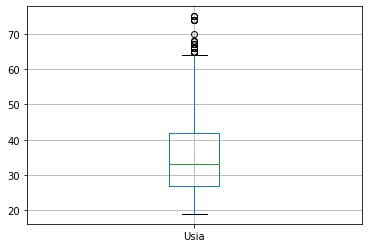

In [6]:
# 2.3.2.5.3 Mengidentifikasi outlier dan validitas data

df.boxplot(column=['Usia'])

In [7]:
# 2.3.2.5.4.1 Imputasi baris data yang kosong dengan asumsi nilai

# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus) untuk variabel kategori dan nilai rata-rata untuk variabel numerik

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  df_numerik[kolom].fillna(df_numerik[kolom].mean(), inplace=True)

for kolom in df_kategori.columns:
  df_kategori[kolom].fillna(df_kategori[kolom].mode()[0], inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_1 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [8]:
# 2.3.2.5.4.2 Tidak menggunakan baris data yang kosong (Drop Data)

# Menggunakan fungsi dropna() untuk menghapus semua baris yang memiliki data kosong
df_pembersihan_2 = df.dropna()

In [9]:
# 2.3.2.5.4.3 Tidak menggunakan kolom data yang kosong (Drop Variable)

# Menggunakan fungsi dropna() untuk menghapus kolom yang memiliki data kosong
df_pembersihan_3 = df.dropna(axis='columns')

In [10]:
# 2.3.2.5.4.4 Kategorikan data yang kosong (Flag)

# Koding berikut memberikan tanda flagging untuk baris data yang berisikan baris data kosong

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  # Membuat kolom baru untuk baris data yang kosong
  df_numerik[kolom+"_missing"] = df_numerik[kolom].isnull()
  df_numerik[kolom].fillna(0, inplace=True)

for kolom in df_kategori.columns:
  # Kolom kategori harus secara eksplisit menambahkan data kategori baru
  df_kategori[kolom] = df_kategori[kolom].cat.add_categories("00_Data_Kosong")
  df_kategori[kolom].fillna("00_Data_Kosong", inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_4 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [11]:
# Melanjutkan proses dengan asumsi bahwa baris data yang kosong tidak signifikan dan tidak akan terjadi baris data kosong lagi.
df_clean = df_pembersihan_2

In [12]:
# 2.3.2.5.5.1 EDA Analisa dasar variabel untuk gagal_bayar

# Untuk melihat frekuensi dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts(normalize=True) * 100)

0_Bayar    626
1_Gagal    248
Name: gagal_bayar, dtype: int64
0_Bayar    71.624714
1_Gagal    28.375286
Name: gagal_bayar, dtype: float64


In [13]:
# 2.3.2.5.5.2 Exploratory Data Analysis untuk SLIK_Kolektabilitas

# Untuk melihat frekuensi dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts(normalize=True) * 100)

3.0    468
1.0    265
2.0     80
5.0     47
4.0     14
Name: SLIK_Kolektibilitas, dtype: int64
3.0    53.546911
1.0    30.320366
2.0     9.153318
5.0     5.377574
4.0     1.601831
Name: SLIK_Kolektibilitas, dtype: float64


In [14]:
# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK Kolektabilitas
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['gagal_bayar'],normalize='index',)*100)

gagal_bayar          0_Bayar  1_Gagal
SLIK_Kolektibilitas                  
1.0                      225       40
2.0                       55       25
3.0                      320      148
4.0                        6        8
5.0                       20       27
gagal_bayar            0_Bayar    1_Gagal
SLIK_Kolektibilitas                      
1.0                  84.905660  15.094340
2.0                  68.750000  31.250000
3.0                  68.376068  31.623932
4.0                  42.857143  57.142857
5.0                  42.553191  57.446809


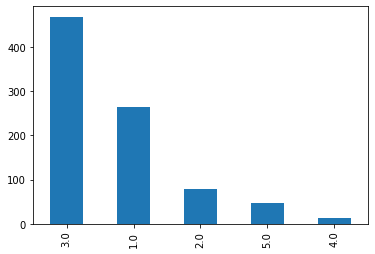

In [15]:
# 2.3.2.5.5.2 SLIK_Kolektibilitas Data Visualisasi

# Fungsi value_counts().plot(kind='bar')
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='bar')

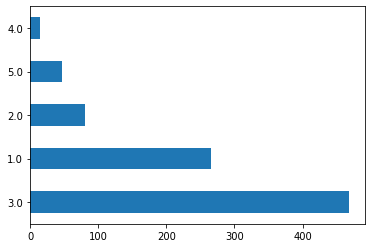

In [16]:
# Menampilkan plot bar secara horizontal
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='barh')

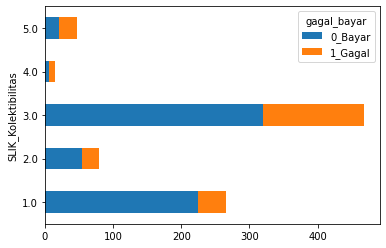

In [17]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']).plot(kind='barh', stacked=True)

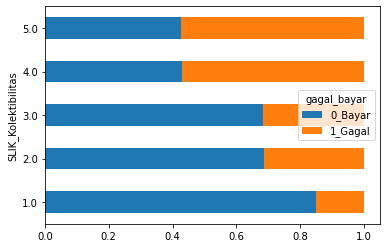

In [18]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar, secara proporsi
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar'], normalize='index').plot(kind='barh', stacked=True)

In [19]:
# 2.3.2.5.5.3 Exploratory Data Analysis untuk Usia

# Rangkuman statistik untuk variabel numerik Usia
print(df_clean['Usia'].describe())

# Rangkuman statistik untuk variabel numerik Usia, berdasarkan default (gagal bayar atau tidak)
df_clean.groupby('gagal_bayar')['Usia'].describe()

count    874.000000
mean      35.770023
std       11.457115
min       19.000000
25%       27.000000
50%       33.500000
75%       42.000000
max       75.000000
Name: Usia, dtype: float64


,count,mean,std,min,25%,50%,75%,max
gagal_bayar,,,,,,,,
0_Bayar,626.0,36.400958,11.398271,19.0,27.0,35.0,43.00,75.0
1_Gagal,248.0,34.177419,11.473644,19.0,25.0,31.0,40.25,74.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

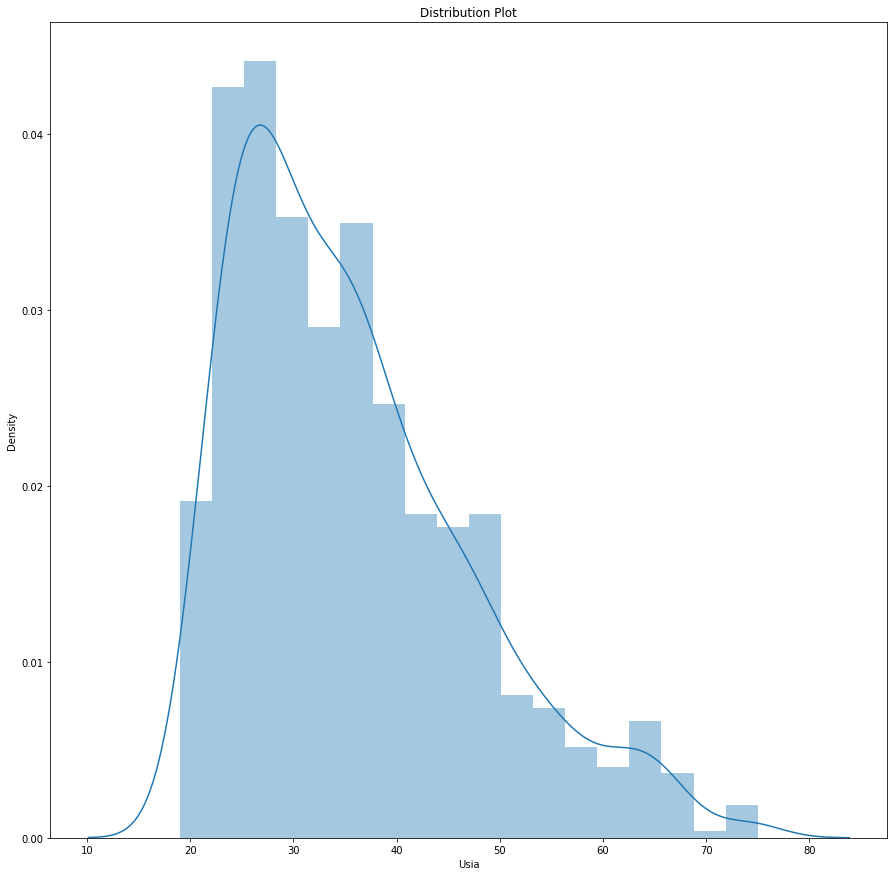

In [20]:
# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(df_clean['Usia'].dropna(), ax=ax).set_title('Distribution Plot')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


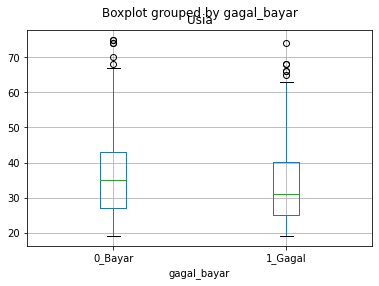

In [21]:
# Menambahkan by di fungsi boxplot untuk membagi boxplot berdasarkan gagal_bayar
df_clean.boxplot(by='gagal_bayar',column=['Usia'])

In [22]:
import numpy as np

# Untuk dapat melakukan analisa statistik, harus mengubah variabel gagal_bayar dari string menjadi angka (integer)
# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df_clean['gagal_bayar'] == '1_Gagal', 
             df_clean['gagal_bayar'] == '0_Bayar'
             ]

choices     = [
             1,
             0
             ]
df_clean['default'] = np.select(conditions,choices, default = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
# Menghitung korelasi antara variabel API_CreditScore_Vendor_Adengan default
print(df_clean['default'].corr(df_clean['Usia']))

-0.08754264342140397


In [24]:
from scipy import stats

# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel 
# API_CreditScore_Vendor_A dengan default (gagal bayar dan tidak gagal bayar)
stats.ttest_ind( df_clean[df_clean.default == 0].Usia,
             	df_clean[df_clean.default == 1].Usia, nan_policy='omit')

Ttest_indResult(statistic=2.59506632950903, pvalue=0.009616154033831778)

In [25]:
# 2.3.2.5.6 Memahami korelasi antar variabel dan dengan target

# Korelasi Antar semua Variabel numerik
import seaborn as sns
corr = df_clean.corr()
corr

,Lama_Cicilan,Jumlah_Pinjaman,Usia,SLIK_Outstanding,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Apps_Installed,default
Lama_Cicilan,1.000000,0.606132,-0.043291,0.085806,-0.047597,-0.043466,-0.018489,0.201927
Jumlah_Pinjaman,0.606132,1.000000,0.036817,0.004555,0.021837,-0.010770,-0.010018,0.144900
Usia,-0.043291,0.036817,1.000000,-0.185181,0.019138,0.016607,0.042908,-0.087543
SLIK_Outstanding,0.085806,0.004555,-0.185181,1.000000,-0.138387,-0.094038,-0.087114,0.502777
API_CreditScore_Vendor_A,-0.047597,0.021837,0.019138,-0.138387,1.000000,-0.006830,0.017581,-0.035224
API_CreditScore_Vendor_B,-0.043466,-0.010770,0.016607,-0.094038,-0.006830,1.000000,-0.004025,-0.156592
Device_Apps_Installed,-0.018489,-0.010018,0.042908,-0.087114,0.017581,-0.004025,1.000000,-0.149216
default,0.201927,0.144900,-0.087543,0.502777,-0.035224,-0.156592,-0.149216,1.000000


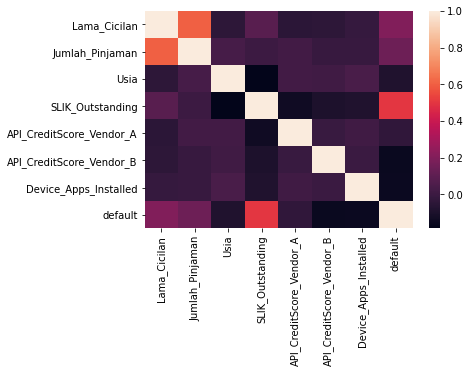

In [26]:
# Korelasi secara visualisasi
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              874 non-null    category
 1   gagal_bayar                     874 non-null    category
 2   Lama_Cicilan                    874 non-null    float64 
 3   Tujuan_Pinjaman                 874 non-null    category
 4   Jumlah_Pinjaman                 874 non-null    float64 
 5   Pekerjaan                       874 non-null    category
 6   Status_Rekening_Bank            874 non-null    category
 7   Pendapatan_perbulan             874 non-null    category
 8   Lama_Bekerja                    874 non-null    category
 9   Status                          874 non-null    category
 10  Kepemilikan_Rumah               874 non-null    category
 11  Alamat_Rumah                    874 non-null    category
 12  Alamat_Kantor         

In [34]:
# 2.3.2.5.6.2 Memahami korelasi antar variabel independent 

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df_clean.select_dtypes(include=['float64','int64','int'])
df_kategori = df_clean.select_dtypes(exclude = ['float64','int64','int'])

# Menghapus kolom yang tidak berkaitan dengan korelasi antar variabel independent
df_kategori.drop(columns=['ID', 'gagal_bayar'], inplace=True)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Tujuan_Pinjaman                 874 non-null    category
 1   Pekerjaan                       874 non-null    category
 2   Status_Rekening_Bank            874 non-null    category
 3   Pendapatan_perbulan             874 non-null    category
 4   Lama_Bekerja                    874 non-null    category
 5   Status                          874 non-null    category
 6   Kepemilikan_Rumah               874 non-null    category
 7   Alamat_Rumah                    874 non-null    category
 8   Alamat_Kantor                   874 non-null    category
 9   Lama_tinggal_ditempat_sekarang  874 non-null    category
 10  debt_burden_ratio               874 non-null    category
 11  SLIK_Kolektibilitas             874 non-null    category
 12  Device_Type           

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.get_dummies(data = df_kategori)

# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

                                            Tujuan_Pinjaman_TV  ...  Email_Domain_Type_Public_Domain
Tujuan_Pinjaman_TV                                    0.000000  ...                     5.001180e-02
Tujuan_Pinjaman_buka_bisnis                           0.380235  ...                     7.311951e-03
Tujuan_Pinjaman_elektronik                            0.210048  ...                     1.769377e-01
Tujuan_Pinjaman_liburan                               0.489051  ...                     3.118684e-01
Tujuan_Pinjaman_makanan                               0.656594  ...                     7.307766e-01
...                                                        ...  ...                              ...
Mobile_Number_Active_Since_3_1_ke_2_tahun             0.225811  ...                     3.202254e-01
Mobile_Number_Active_Since_4_2_ke_5_tahun             0.190110  ...                     1.549275e-01
Mobile_Number_Active_Since_5_Lebih_5_tahun            0.607531  ...                     4.6

In [39]:
loan = df_kategori

res.columns = ['Column', 'Hypothesis']
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(loan[i])
    bon_p_value = 0.05/loan[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(loan['Loan_Status'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

NameError: ignored

In [ ]:
# 2.3.2.5.7.1 Weight of Evidence (WOE)